In [1]:
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = 'n52.geojson'
bufferRadiusMeters = 1000
outputFilename = 'buffer.geojson'

In [3]:
gj = gpd.read_file(filename)
gj.head()

,geometry
0,POINT (7.65205 51.93503)


In [4]:
# UTM Zones are six degrees wide. You can determine the zone by adding 183 degrees to longitude,
# dividing by 6 and rounding (or adding 186 and truncating after division).
lon = gj.head().centroid.x
utmTargetZone = max(1, int(round((183 + lon) / 6)))
utmTargetZone

32

In [5]:
buffer = gj.copy()
buffer.geometry = buffer['geometry'].to_crs("EPSG:326" + str(utmTargetZone)).buffer(bufferRadiusMeters)
buffer = buffer.to_crs("EPSG:4326").head()

<AxesSubplot:>

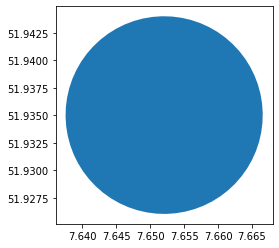

In [6]:
buffer.plot()

In [7]:
buffer.to_file(outputFilename, driver = 'GeoJSON')